<a href="https://colab.research.google.com/github/JJungEEun/dacon/blob/main/%EC%8B%AC%EC%9E%A5%20%EC%A7%88%ED%99%98%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%8B%AC%EC%9E%A5%EC%A7%88%ED%99%98%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

## 데이터 불러오기

In [3]:
train = pd.read_csv('/content/drive/MyDrive/dacon/심장 질환 예측 경진대회/dataset/train.csv', sep=',', encoding='cp949')
train.head(10)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
5,6,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
6,7,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
7,8,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
8,9,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
9,10,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [34]:
# id: 데이터 고유 id
# age: 나이
# sex: 성별 (여자 = 0, 남자 = 1)
# cp: 가슴 통증(chest pain) 종류 
  # 0 : asymptomatic 무증상
  # 1 : atypical angina 일반적이지 않은 협심증
  # 2 : non-anginal pain 협심증이 아닌 통증
  # 3 : typical angina 일반적인 협심증
# trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
# chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
# fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
# restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
  # 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
  # 1: 정상
  # 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# thalach: (maximum heart rate achieved) 최대 심박수
# exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
# oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
# slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
  # 0: downsloping 하강
  # 1: flat 평탄
  # 2: upsloping 상승
# ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
# Null 값은 숫자 4로 인코딩됨 
# thal: thalassemia 지중해빈혈 여부
  # 0 = Null 
  # 1 = normal 정상
  # 2 = fixed defect 고정 결함
  # 3 = reversable defect 가역 결함
# target: 심장 질환 진단 여부
  # 0: < 50% diameter narrowing
  # 1: > 50% diameter narrowing

In [16]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


# 데이터 시각화

**히스토그램**

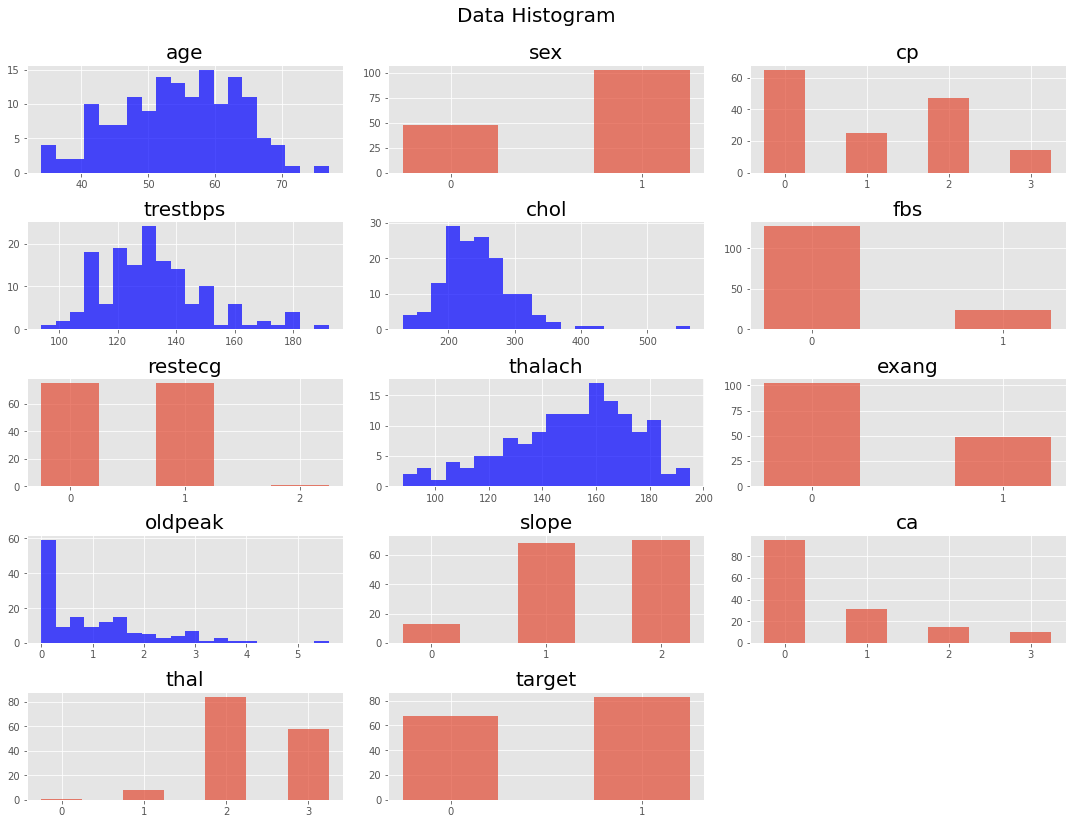

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(15,12))
plt.suptitle("Data Histogram", fontsize=20)

# id는 제외하고 시각화
cols = train.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**바이올린차트**

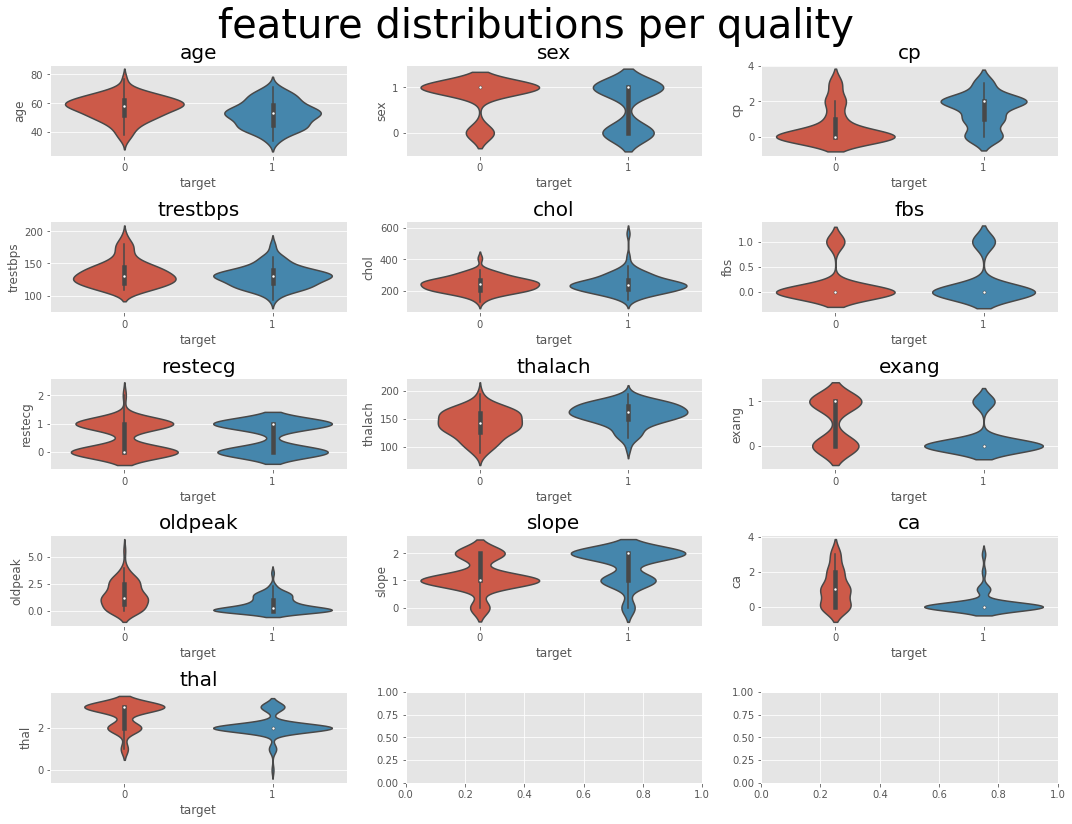

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns[1:-1]):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**상관관계**

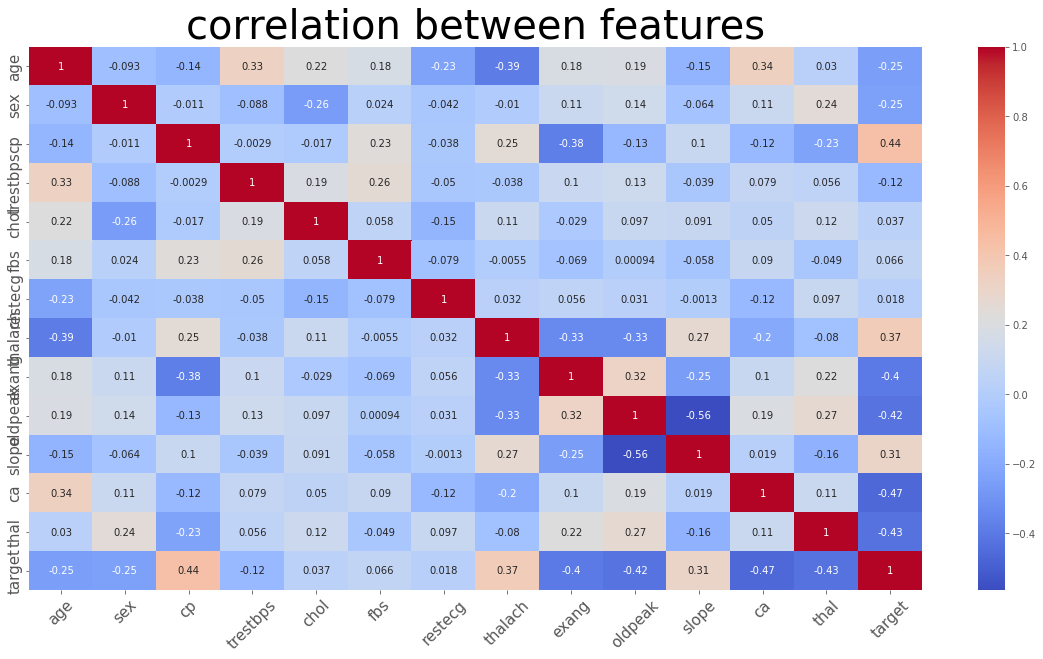

In [12]:
plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

**환자 데이터**

In [4]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

[Text(0, 0, '심장병 없음'), Text(0, 0, '심장병 있음')]

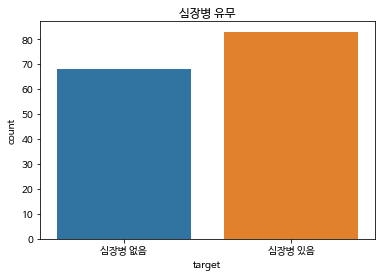

In [6]:
plt = sns.countplot(x='target', data=train)
plt.set_title("심장병 유무")
plt.set_xticklabels(['심장병 없음', '심장병 있음'])

# 데이터 전처리

# 모델 학습


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
X = train.iloc[:, 1:-1] # id와 target을 제거
y = train.iloc[:, -1] # target만 선택

In [20]:
lr = LogisticRegression()
lr.fit(X, y)

lr_preds = lr.predict(X)

print(f'accuracy: {sum(lr_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, lr_preds)}')

accuracy: 0.8807947019867549
f1_score : 0.8953488372093023


In [24]:
def score(preds):
  train['preds'] = preds # dataframe에 예측값 삽입

  pred_pos = train[train['preds'] == 1] # 심장병이 있다 예측한 데이터
  pred_neg = train[train['preds'] == 0] # 심장병이 없다 예측한 데이터

  tp = pred_pos[pred_pos['target'] == 1] # 심장병이 있다고 예측한 데이터에서 실제로 심장병이 있는 사람들의 데이터
  fp = pred_pos[pred_pos['target'] == 0] # 심장병이 있다고 예측한 데이터에서 실제로는 심장병이 없는 사람들의 데이터

  tn = pred_neg[pred_neg['target'] == 0] # 심장병이 없다고 예측한 데이터에서 실제로 심장병이 없는 사람들의 데이터
  fn = pred_neg[pred_neg['target'] == 1] # 심장병이 없다고 예측한 데이터에서 실제로는 심장병이 있는 사람들의 데이터



  # 정밀도: 모델이 심장병이 있다고 예측한 사람들중 실제로 심장병이 있는 사람의 비율
  precision = len(tp) / (len(tp) + len(fp))

  # 재현율 : 실제로 심장병이 있는 사람들중 모델이 심장병이 있다 예측한 사람의 비율
  recall = len(tp) / (len(tp) + len(fn))

  f1 = 2 * precision * recall / (precision + recall)


  print(f'정밀도: {precision}')
  print(f'재현율: {recall}')
  print(f'f1 스코어: {f1}')

In [25]:
score(lr_preds)

정밀도: 0.8651685393258427
재현율: 0.927710843373494
f1 스코어: 0.8953488372093023


In [32]:
# Import library
import pandas as pd
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import csv

# Model list
def models(model):
    if model == 'knn':
        mod = KNeighborsClassifier(2)
    elif model == 'svm':
        mod = SVC(kernel="linear", C=0.025)
    elif model == 'svm2':
        mod = SVC(gamma=2, C=1)
    elif model == 'gaussian':
        mod = GaussianProcessClassifier(1.0 * RBF(1.0))
    elif model == 'tree':
        mod =  DecisionTreeClassifier(max_depth=5)
    elif model == 'forest':
        mod =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    elif model == 'mlp':
        mod = MLPClassifier(alpha=1, max_iter=1000)
    elif model == 'adaboost':
        mod = AdaBoostClassifier()
    elif model == 'gaussianNB':
        mod = GaussianNB()
    elif model == 'qda':
        mod = QuadraticDiscriminantAnalysis()
    return mod

#make model list in models function
model_list = ['knn', 'svm', 'svm2', 'gaussian', 'tree', 'forest', 'mlp', 'adaboost', 'gaussianNB', 'qda']

cnt = 0
empty_list = [] #empty list for progress bar in tqdm library
for model in (model_list):
    empty_list.append(model) # fill empty_list to fill progress bar
    #classifier
    clf = models(model)

    #Training
    clf.fit(X, y) #학습할때는 id와 target을 제외하고 학습! 마지막 column이 라벨이므로 라벨로 설정!

    #Predict
    pred = clf.predict(X) #마찬가지로 예측을 할 때에도 id를 제외하고 나머지 feature들로 예측
    print(model)
    score(pred)

knn
정밀도: 1.0
재현율: 0.6024096385542169
f1 스코어: 0.7518796992481204
svm
정밀도: 0.8
재현율: 0.963855421686747
f1 스코어: 0.8743169398907104
svm2
정밀도: 1.0
재현율: 1.0
f1 스코어: 1.0
gaussian
정밀도: 1.0
재현율: 1.0
f1 스코어: 1.0
tree
정밀도: 0.975609756097561
재현율: 0.963855421686747
f1 스코어: 0.9696969696969697
forest
정밀도: 0.9310344827586207
재현율: 0.9759036144578314
f1 스코어: 0.9529411764705883
mlp
정밀도: 0.927710843373494
재현율: 0.927710843373494
f1 스코어: 0.927710843373494
adaboost
정밀도: 0.9880952380952381
재현율: 1.0
f1 스코어: 0.9940119760479043
gaussianNB
정밀도: 0.8372093023255814
재현율: 0.8674698795180723
f1 스코어: 0.8520710059171598
qda
정밀도: 0.9259259259259259
재현율: 0.9036144578313253
f1 스코어: 0.9146341463414634
